# `DSML Workshop 10` - Introduction to Classification

In this workshop we will dive into classification. Classification is the (supervised) prediction of classes. This means our target variable can take only a set of discrete values (versus the continuous case for regression). 

We will cover the following: 
1. Linear Classification
1. Non-Linear Classification
1. Evaluating Classification Models

Whereas our previous introduction to machine learning focused on the case of predicting real-valued outputs (called the regression setting), these notes consider the case of predicting discrete-valued outputs. This is called the classification setting. And while it may seem as though this would require very different techniques to handle (after all, the regression setting we just considered made very "continuous" predictions rather than discrete ones), one nice thing about our generic framework for machine learning is that in reality, there is very little difference between how we handle regression and classification problems. Like before, there are hypothesis functions, loss functions, and our goal is still to solve the canonical problem of minimizing the sum of losses on a data set (the only real difference is in the choice of loss function, as we will see even the hypothesis class largely remains the same).



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.set_printoptions(suppress=True) # suppress scientific notation
%matplotlib inline

## `Linear Classification`

Let us first consider a very simple illustrative example...

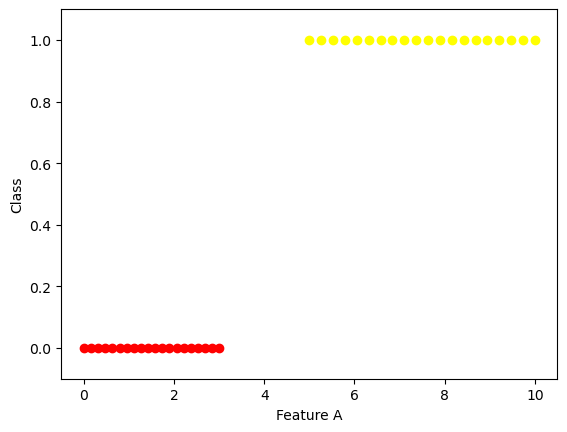

In [2]:
# create illustrative data
x1 = np.linspace(0, 3, 20)
x2 = np.linspace(5, 10, 20)
y1 = np.zeros(20)
y2 = np.ones(20)

plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='yellow')
plt.xlabel("Feature A")
plt.ylabel("Class")
plt.ylim(-0.1,1.1)
plt.show()

Imagine we have a dataset with only a single feature A and two classes, namely red and yellow. For larger values of feature A, it appears that observations are more likely to belong to class yellow. A linear classifier would attempt to draw a straight line separating the two classes. For this one-dimensional case, this is something we could do by hand.

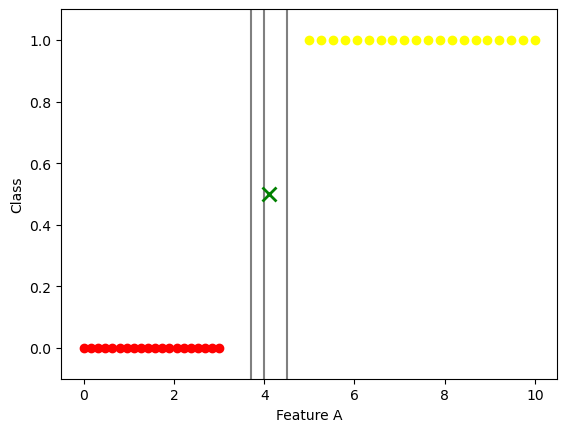

In [3]:
# create illustrative data
x1 = np.linspace(0, 3, 20)
x2 = np.linspace(5, 10, 20)
y1 = np.zeros(20)
y2 = np.ones(20)

plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='yellow')
plt.plot([4, 4], [-0.1, 1.1], color='grey')
plt.plot([4.5, 4.5], [-0.1, 1.1], color='grey')
plt.plot([3.7, 3.7], [-0.1, 1.1], color='grey')
plt.plot([4.1], [0.5], 'x', color='green', markeredgewidth=2, markersize=10) # add a new datapoint illustrating a new observation
plt.xlabel("Feature A")
plt.ylabel("Class")
plt.ylim(-0.1,1.1)
plt.show()

However, you might notice one problem: where exactly should we draw the line? This question is quite relevant, as you can see by considering a new observation (represented by the green X). Depending on the chosen line, we would classify this observation as either red or yellow. Also realize how the line we are searching for here is different from the line we were fitting in linear regression. **Instead of "fitting a line to the data", we are now "separating the classes with a line".**


Let us now move on and pretend we have two features, namely A and B, instead of one.

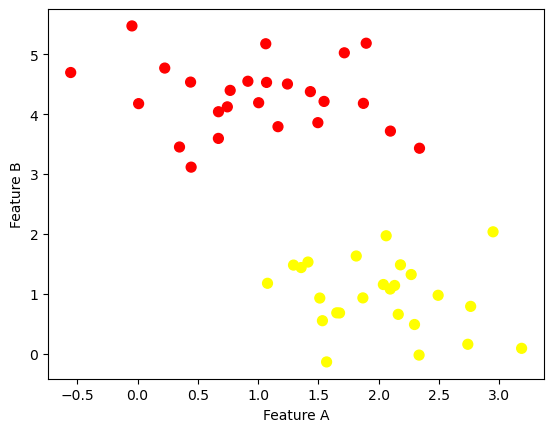

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlabel("Feature A")
plt.ylabel("Feature B")
plt.show()

Again, we can see that Features A and B provide information on class affiliation. A linear discriminative classifier would attempt to draw a straight line (or hyperplane for that matter) separating the two sets of data, and thereby create a model for classification. For two-dimensional data like that shown here, we could still do this by hand. The problem, however, remains: there is more than one possible separating boundary that can perfectly discriminate between the two classes!

We can draw them as follows:

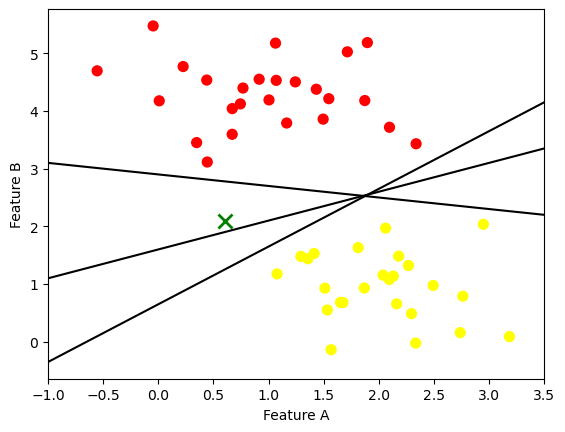

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='green', markeredgewidth=2, markersize=10) # add a new datapoint illustrating a new observation

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlabel("Feature A")
plt.ylabel("Feature B")
plt.xlim(-1, 3.5)
plt.show()

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Again, notice how "drawing a line" is different in this classification setting from fitting a linear regression line as we used to before.

## Example: breast cancer classification

As an example to introduce classification problems, we're going to turn to a classical example from the machine learning literature, first presented in [[Street et al, 1993]](http://ftp.cs.wisc.edu/math-prog/tech-reports/olm102.ps), namely identifying whether cancer cells from a biopsy are malignant or benign.  This was historically an important dataset in the intersection of machine learning and health care, and similar subjects are still a topic of very active research.  Of course, 25 years ago, the techniques were much more primitive and computationally less intensive than current approaches to similar problems, but the work has become a classical dataset in machine learning, and also represents a compelling applications.

To create the data set, researchers took 569 images of cancerous cells, under a microscope, and manually selected the outlines of the different cells (this step is the kind of thing that would ideally be replaced by automatic computer vision architectures in current systems).  The resulting figures looked like this:
![Image of (manually) selected outlines of cells under a microscope.](cancercells.png)
The researchers then considered 10 different features of each cell, for instance the area, perimeter, texture, number of concave points (i.e., indentations), variance of grayscale color, and some others (a full list can be found in the above paper).  For each of these 10 features they computed the mean, max, and standard deviation of the feature across all the cells in the image, resulting in a 30 dimensional vector describing each sample.

In [6]:
# read in the data
cancer_df = pd.read_csv("breast_cancer.csv", index_col = "id")
print("Number of benign samples:", len(cancer_df[cancer_df["diagnosis"]=="B"]))
print("Number of malignant samples:", len(cancer_df[cancer_df["diagnosis"]=="M"]))

Number of benign samples: 357
Number of malignant samples: 212


In [7]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Let us first plot a single feature, namely `area_mean`, and see how the results differ for **malignant** and **benign** tumors:

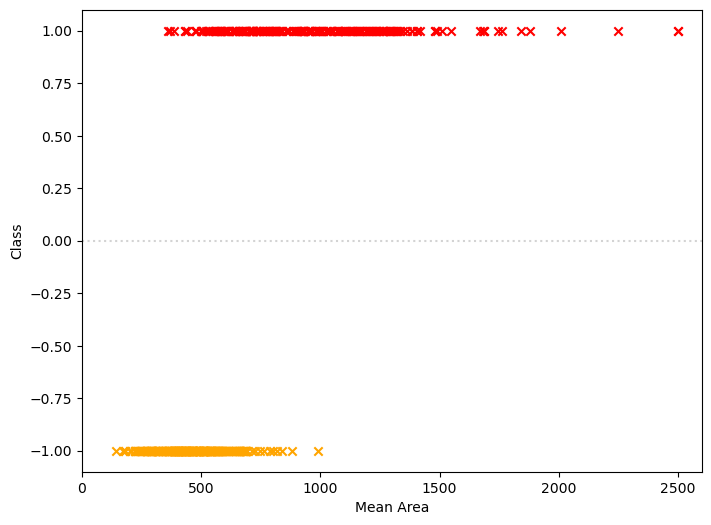

In [8]:
# this function scales class_membership so that M equals 1 and B equals -1
def rescale_classes(class_membership, true_label='M'):
    return (class_membership == true_label).astype(int) * 2 - 1

# this function plots the samples
def plot_cells(variable='area_mean'):
    plt.figure(figsize=(8,6))
    malign = cancer_df[cancer_df["diagnosis"]=="M"]
    benign = cancer_df[cancer_df["diagnosis"]=="B"]
    plt.scatter(benign[variable], rescale_classes(benign['diagnosis']), marker='x', color='orange')
    plt.scatter(malign[variable], rescale_classes(malign['diagnosis']), marker='x', color='red')
    plt.plot([0, 2600], [0,0], color='lightgrey', linestyle='dotted')
    plt.xlim([0,2600])
    plt.ylim([-1.1,1.1])
    plt.xlabel("Mean Area")
    plt.ylabel("Class")
    
plot_cells()

In order to classify the tumors based on their mean area, let us first stick with what we know: linear regression. With linear regression, we can fit a line that aims to predict -1 or 1 for each tumor using a squared error as loss function.

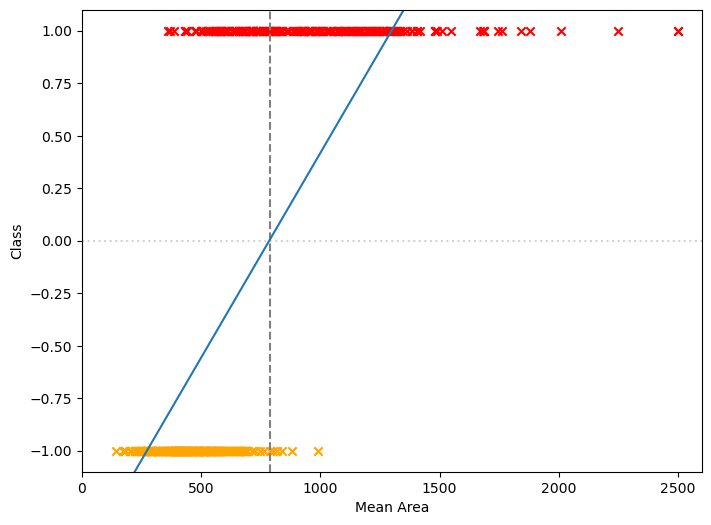

In [9]:
# define x and y
x = cancer_df['area_mean'].values.reshape(-1,1)
y = rescale_classes(cancer_df['diagnosis'])

# fit model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(x, y)

# plot
plot_cells()
xfit = np.linspace(0, 2600)
plt.plot([790, 790], [-1.1, 1.1], color='grey', linestyle='--')
plt.plot(xfit, linear_reg.predict(xfit.reshape(-1,1)))
plt.show()

The blue line plots the hypothesized values. Note how we can derive our separating boundary (the grey dashed line): it is located at the point for which our linear regression predicts precisely 0, i.e. the point where we would not know whether to predict if this is a malignant or benign tumor.

**Exercise**: What do you think about our classification model? Is this the optimal separating boundary? Do you see any problems?

### Alternative losses for classification

As we have seen above, our beloved mean squared error does not seem to be a great choice of a loss function in a classification setting. Luckily, we have other options at our disposal. There are many such losses, and different choices lead to different machine learning algorithms (often with very little indication that all that differs between the algorithm is in fact the choice of loss function).  Let's consider a few of the more common ones:

- **0/1 loss:** 
\begin{equation}
\ell_{\mathrm{0/1}}(h_\theta(x), y) = 
      \begin{cases}
      0 & \text{if sign $h_\theta(x) = y$}\\
      1 & \text{otherwise}
      \end{cases}
\end{equation}
Major disadvantage: function is non-smooth and therefore cannot be used with algorithms like gradient descent.

- **Logistic loss:** 
\begin{equation}
\ell_{\mathrm{logistic}}(h_\theta(x), y) = \log(1+\exp(-h_\theta(x) \cdot y))
\end{equation}
For large positive values of $h_\theta(x) \cdot y$, $\exp(-h_\theta(x) \cdot y)$ will be very close to zero, so the loss will approach zero; for large negative values $\log(1+\exp(-h_\theta(x) \cdot y)) \approx -h_\theta(x) \cdot y$ so the loss increases approximately linearly.

- **Hinge loss:**
\begin{equation}
\ell_{\mathrm{hinge}}(h_\theta(x), y) = \max\{1 - h_\theta(x) \cdot y, 0\}
\end{equation}
As long as $h_\theta(x) \cdot y \geq 1$, this loss will be zero, whereas it will increase linearly for negative $h_\theta(x) \cdot y \geq 1$.

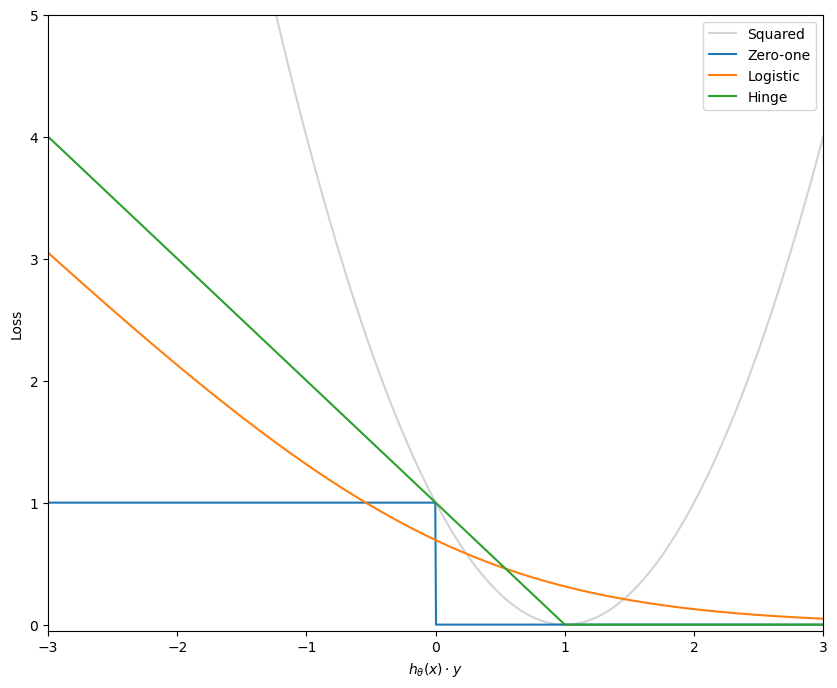

In [10]:
hy = np.linspace(-3,3,1000)
plt.figure(figsize = (10,8))
plt.plot(hy, np.square(hy-1), c="lightgrey")
plt.plot(hy,(hy<=0))
plt.plot(hy, np.log(1+np.exp(-hy)))
plt.plot(hy, np.maximum(1 - hy, 0))

plt.xlim([-3,3])
plt.ylim([-0.05, 5])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")
plt.legend(['Squared', 'Zero-one', 'Logistic', 'Hinge'])
plt.show()

**Exercise**: What is the main difference between the squared and the other loss functions? Which benefits/problems do you see with each loss?

## Solving classification tasks

With this framework and set of loss functions laid out, the task of learning a classifier is exactly the same as the regression methods we considered previously.  That is, given a data set we seek to minimize the average loss
\begin{equation}
\min_{\theta} \frac{1}{m}\sum_{i=1}^{m} \ell(h_{\theta}(x^{(i)}),y^{(i)})
\end{equation}

We can solve it by resorting to, for example, gradient descent. To see how this works, we'll next consider some collection of specific machine learning algorithms that result in specific choices of loss function.

### `Logistic regression`

Logistic regression results from choosing the logistic loss
\begin{equation}
\ell_{\mathrm{logistic}}(h_\theta(x), y) = \log(1+\exp(-h_\theta(x) \cdot y))
\end{equation}
as our classification loss to minimize.  Logistic regression also has a nice probabilistic interpretation: certain quantities give the _probability_, under a particular model, of an example being positive or negative. We will consider this probabilistic setting later, but for now we are going to simply treat it as another loss minimization algorithm.

Assuming a linear hypothesis function (the typical assumption under logistic regression), the partial deriative of the logistic loss is given by
\begin{equation}
\begin{split}
\frac{\partial}{\partial \theta_j} \log(1+\exp(-\theta^T x \cdot y)) & = \frac{1}{1+\exp(-\theta^T x \cdot y)} \frac{\partial}{\partial \theta_j} (1+\exp(-\theta^T x \cdot y))\\  
& = - \frac{\exp(-\theta^T x \cdot y)}{1+\exp(-\theta^T x \cdot y)} x_j\cdot y \\
& = -\frac{1}{1+\exp(\theta^T x \cdot y)} x_j\cdot y
\end{split}
\end{equation}
where in the last line we use the fact that
\begin{equation}
\frac{\exp(-x)}{1+\exp(-x)} = \frac{\exp(-x)}{1+\exp(-x)} \cdot \frac{\exp(x)}{\exp(x)} = \frac{1}{1+\exp(x)}
\end{equation}


Thus, the gradient of the entire objective function for logistic regression (we'll omit any regularization term, though we could also add this if desired) is given by

\begin{equation}
\begin{split}
\nabla_\theta E(\theta) & = 
\nabla_\theta \frac{1}{m} \sum_{i=1}^m \log \left (1+ \exp \left (\theta^T x^{(i)} \cdot y^{(i)} \right )\right) \\
& = \frac{1}{m} \sum_{i=1}^m -x^{(i)} y^{(i)} \frac{1}{1+\exp\left(\theta^T x^{(i)} \cdot y^{(i)}\right)}.
\end{split}
\end{equation}

We can use this derivation to write the gradient descent procedure for logistic regression.

For the purpose of this exercise, however, we will use the readily available `LogisticRegression` class in scikit learn. First, however, make sure to standardize your input features using the `StandarScaler` class in scikit learn. This should be the default approach in any classification setting! The `StandarScaler` has a similar interface as the machine learning classes, where you first initialize, then use `.fit()` (which computes the mean and variance of a column), and `.transform()` (which converts the data to have zero mean and unit variance).  Let's see how this class works.

In [11]:
# define x and y
x = cancer_df['area_mean'].values.reshape(-1,1)
y = cancer_df['diagnosis']

# standardize x
from sklearn.preprocessing import StandardScaler

norm = StandardScaler() # initialize
X_norm = norm.fit_transform(x)  # simultaneously fit and transform

**Recall**: StandardScaler standardizes to 0 mean and unit variance. Also note that we do not actually have to re-scale our target variable; LogisticRegression can handle the labels as they are.

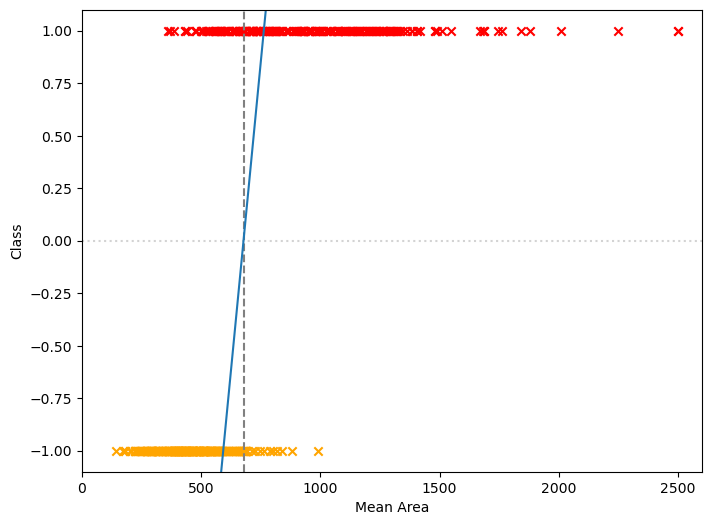

In [12]:
from sklearn.linear_model import LogisticRegression

# fit model
model_log = LogisticRegression(C=100)   # C is a regularization term, we set it to 100 here
model_log.fit(X_norm, y)

# plot
plot_cells()
xfit = np.linspace(0, 2600)
xfit_scaled = norm.transform(xfit.reshape(-1,1))
plt.plot([680, 680], [-1.1, 1.1], color='grey', linestyle='--')
plt.plot(xfit, model_log.decision_function(xfit_scaled.reshape(-1,1)))
plt.show()

**Exercise:** How do the predictions from our logistic regression differ from the ones produced by the linear regression above? How is the resulting separating boundary (manually plotted in the graph above) different?

Note that in the graph above, we plotted the raw outputs from our hypothesis function using the `decision_function`-method. The `predict`-method, on the other hand, gives us the predicted class labels:

In [13]:
predictions = model_log.predict(X_norm)
predictions[:10].reshape(-1,1) # print first 10 predictions

array([['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B']], dtype=object)

One of the nice properties of a logistic regression is the possibility to return not only the raw predictions (from the hypothesis function) or the predicted class labels (using the predict-method), but we can also return the predicted probabilities of belonging to a class using the `predict_proba`-method:

In [14]:
print("Order of classes:", model_log.classes_)
model_log.predict_proba(X_norm)[:10] # return predicted probabilities for first 10 observations

Order of classes: ['B' 'M']


array([[0.02190445, 0.97809555],
       [0.00049134, 0.99950866],
       [0.00208155, 0.99791845],
       [0.96852505, 0.03147495],
       [0.00069069, 0.99930931],
       [0.91351031, 0.08648969],
       [0.01396422, 0.98603578],
       [0.76365072, 0.23634928],
       [0.86477332, 0.13522668],
       [0.91461793, 0.08538207]])

**Background:** how does a logistic regression generate these probabilities? The key is a simple transformation of our linear hypothesis function. Remember that our hypothesis function $h_\theta(x)$ is just a linear combination of our input features and their respective coefficients. The resulting values are represented by the blue line in the plot above. The output from our linear hypothesis function is unbounded, meaning that predicted values can theoretically vary from very positive to very negative numbers. Since we are predicting only two classes, this is not ideal. Instead, what we really want are predictions that are restricted to a range of 0 and 1 - which would enable interpreting the predictions as probabilities. The sigmoid transformation, defined as $1/(1+e^{-h_\theta(x)})$ does exactly that. We can visualize this using our plot above, but changing the scale of our y-axis to 0 and 1 instead of -1 and 1:

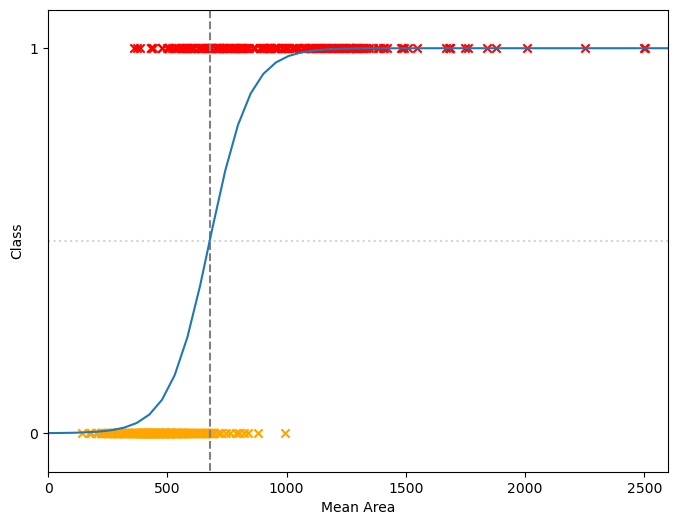

In [15]:
plt.figure(figsize=(8,6))
malign = cancer_df[cancer_df["diagnosis"]=="M"]
benign = cancer_df[cancer_df["diagnosis"]=="B"]
plt.scatter(benign['area_mean'], benign['diagnosis'], marker='x', color='orange')
plt.scatter(malign['area_mean'], malign['diagnosis'], marker='x', color='red')
plt.plot([0, 2600], [0.5,0.5], color='lightgrey', linestyle='dotted')
plt.xlim([0,2600])
plt.ylim([-0.1,1.1])
plt.xlabel("Mean Area")
plt.ylabel("Class")
plt.yticks(ticks = [0,1], labels=[0,1])
xfit = np.linspace(0, 2600)
xfit_scaled = norm.transform(xfit.reshape(-1,1))
plt.plot([680, 680], [-1.1, 1.1], color='grey', linestyle='--')
plt.plot(xfit, model_log.predict_proba(xfit_scaled.reshape(-1,1))[:,1])
plt.show()

In the plot above, the blue curve illustrates the probability of belonging to class "malignant".

### `Support vector machine classification`

Let us now briefly turn to a second classification model: Support vector machines (SVMs). SVMs use the **hinge loss**
\begin{equation}
\ell_{\mathrm{hinge}}(h_\theta(x),y) = \max \{1-h_\theta(x)\cdot y, 0\}
\end{equation}
as the loss function to minimize.  If you have seen support vector machines before, you may have seen them explained in a geometric context, illustrating that they maximize the "margin" of separation between examples of different classes.  This is true, and support vector machines absolutely can be viewed this way.  But it is also instructive to simply understand them as minimizing the particular loss function above.

Support vector machines also refer either to a linear hypothesis function, or a particular form of nonlinear hypothesis known as a _kernel_ hypothesis; if you ever hear the terms "linear SVM" or "kernel SVM", this is just the designation of which type of hypothesis function they are using.  That is, linear SVMs use the hypothesis function
\begin{equation}
h_\theta(x) = \sum_{j=1}^n \theta_j x_j = \theta^T x,
\end{equation}


To illustrate, let us first add a second feature of the breast cancer dataset: in addition to `area_mean`, we now also consider `concave points_mean` and see how the results differ for **malignant** and **benign** tumors:

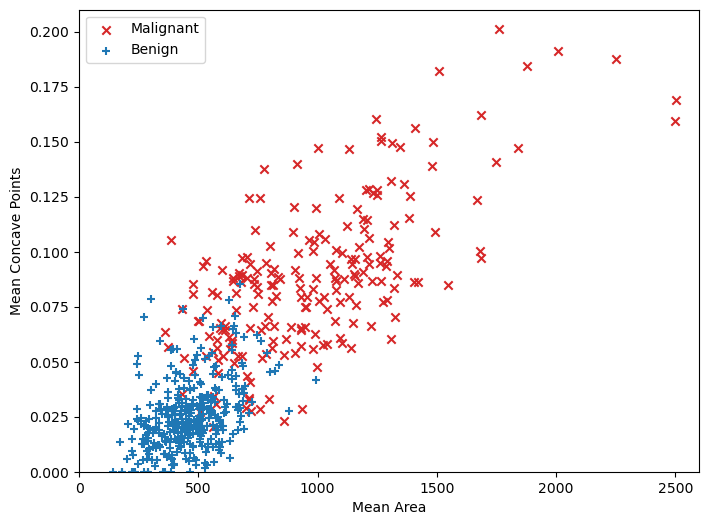

In [16]:
def plot_cells(x='area_mean',y='concave points_mean'):
    plt.figure(figsize=(8,6))
    plt.scatter(cancer_df[cancer_df["diagnosis"]=='M'][x], cancer_df[cancer_df["diagnosis"]=='M'][y], marker='x', color='C3')
    plt.scatter(cancer_df[cancer_df["diagnosis"]=='B'][x], cancer_df[cancer_df["diagnosis"]=='B'][y], marker='+', color='C0')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend(['Malignant','Benign'])
    
plot_cells()

There is obviously some structure to the data here: cells with greater average area and greater numbers of concave points are more likely to be malignant. Remember that we are still trying to find the optimal separating boundary:

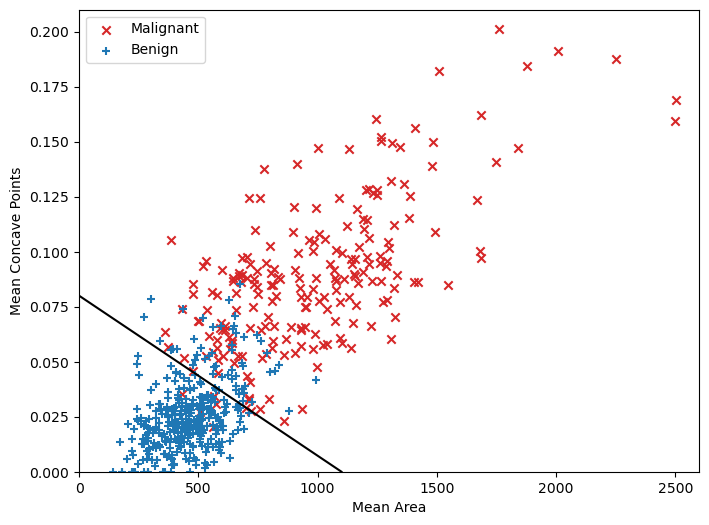

In [17]:
plot_cells()
plt.plot([0, 1100], [0.08,0], 'k-') # we manually fit a line here by defining the intercepts with the x- and y-axis
plt.show()

Just as our linear regression line did not pass exactly through all the data points, here, we can't achieve a line that exactly separates all the data points. But there is clearly a structure in which points below the line are "more likely" to be benign, and points above the line are "more likely" to be malignant.

Before moving on, let's define our X and Y and remember to standardize the input features.

In [18]:
# define X and Y
X = np.array(cancer_df[['area_mean','concave points_mean']])
Y = cancer_df['diagnosis'].values

# standardize X
norm = StandardScaler()
X_norm = norm.fit_transform(X)  # simultaneously fit and transform

**SVM Intuition: Maximizing the Margin**

Let's again gain a basic understanding of what using a Hinge loss function means graphically. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

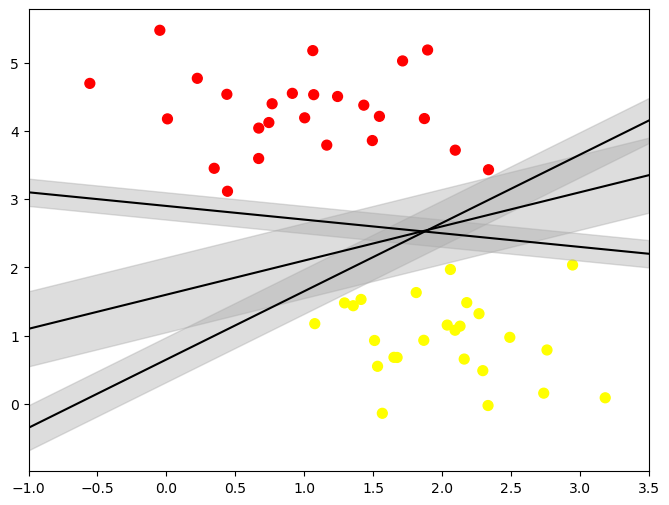

In [19]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,6))
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.show()

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.

### Fitting a support vector machine

We will use sklearn's `LinearSVC` class. Alternatively, you could also use the `SVC` class. The methods should look familiar to you (`.fit()` to train, `.predict()` to get the predicted classes, `.decision_function()` to get the actual output of the hypothesis function). Again, there is no need to encode our target variable; `LinearSVC` can deal with our labels M and B. Similar to the `LogisticRegression` class, C is the regularization parameter.

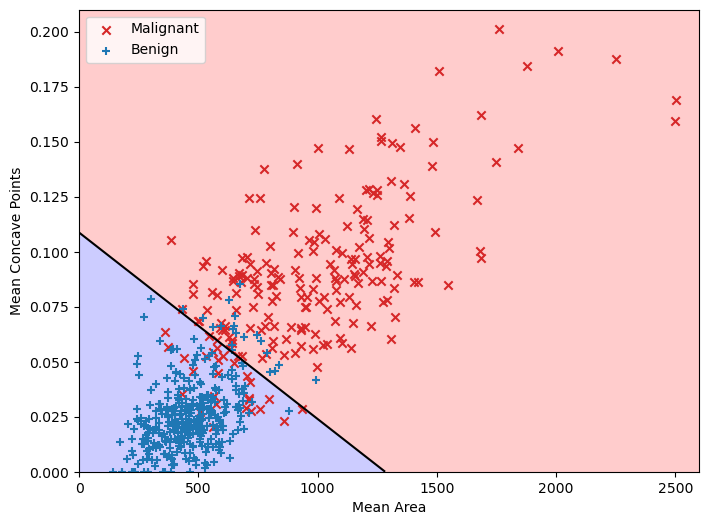

In [20]:
# train SVM
from sklearn.svm import LinearSVC

model_SVM = LinearSVC(loss="hinge", C=1)
model_SVM.fit(X_norm, Y)

# plot
def plot_classification_sklearn(model, norm):
    x_range = [0,2600]
    y_range = [0, 0.21]
    plt.figure(figsize = (8,6))
    
    # plot classification regions
    grid=1000
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    zz = model.decision_function(norm.transform(X_)).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-float("inf"),0,float("inf")],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')
    
    # plot data points
    s1 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='M']['area_mean'], cancer_df[cancer_df["diagnosis"]=='M']['concave points_mean'], marker='x', color='C3')
    s2 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='B']['area_mean'], cancer_df[cancer_df["diagnosis"]=='B']['concave points_mean'], marker='+', color='C0')    
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2],['Malignant','Benign'],ncol=1,loc="upper left")

plot_classification_sklearn(model_SVM, norm)

## `Non-Linear Classification`

Remember that when discussing linear regression a couple of weeks ago, we tried to predict peak electricity demand using peak temperature. Eventually, we did not only include peak temperature, but instead generated additional features from this raw input using polynomials or RBFs. You guessed it, we can do exactly the same for classification. 

Just like for linear vs. non-linear regression, the application to the classification setting is just a matter of plugging in the relevant features into our classification algorithms.

For the example above, we could easily use `PolynomialFeatures` to create polynomial features based on our raw inputs `area_mean` and `concave points_mean` and then train our `LinearSVC` model again. However, luckily, the `SVC` class has a very convenient way of doing so. Using the `kernel`-parameter, we can easily specify whether we want to simply use our raw inputs as features (= linear kernel) or whether we want to create polynomial features or RBFs. To illustrate, let's re-create the graph from above, just using the `SVC` class instead of `LinearSVC`.

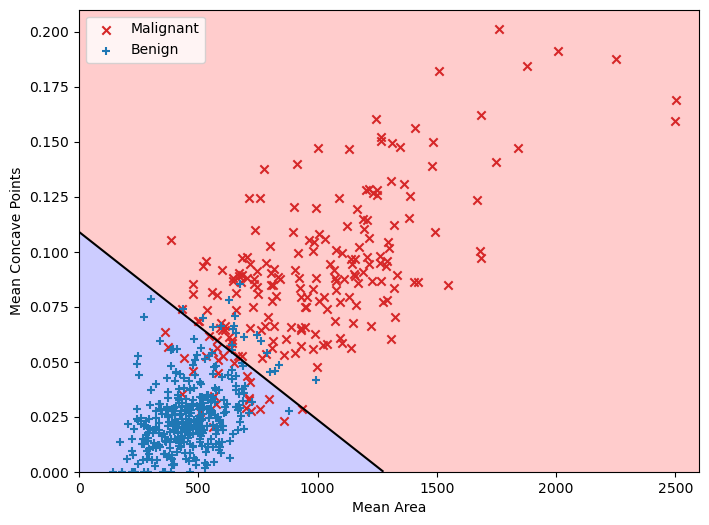

In [21]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=100)
model.fit(X_norm, Y)
plot_classification_sklearn(model, norm)

### `Polynomial Kernel`

Now, let's add polynomial features. Note that in addition to adding the `degree=d` parameter, you'll want to set the `coef0=1.0` parameter to include the constant term `1` in the kernel function (without this, the polynomial kernel only has terms of degree _exactly_ $d$, and typically performs quite poorly).

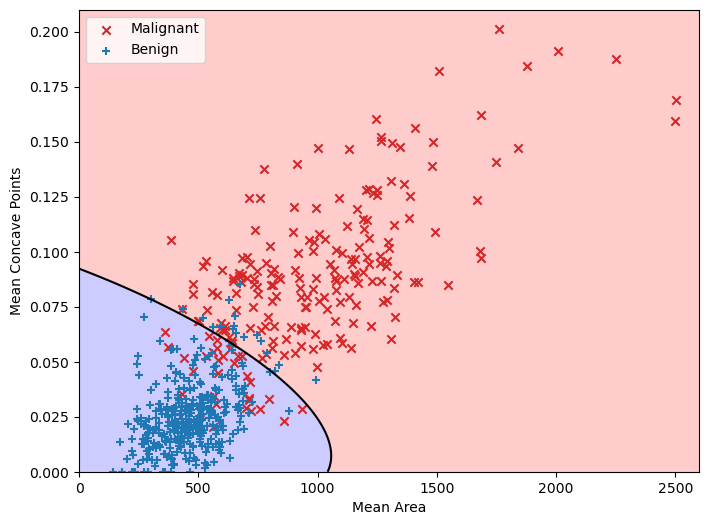

In [22]:
model = SVC(kernel='poly', C=100.0, degree=2, coef0=1.0)
model.fit(X_norm, Y)
plot_classification_sklearn(model, norm)

What happens if we increase the degrees?

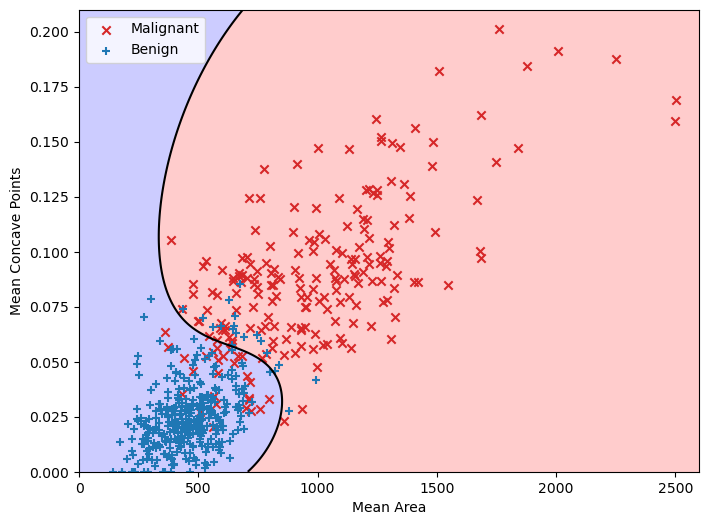

In [23]:
model = SVC(kernel='poly', C=100.0, degree=3, coef0=1.0)
model.fit(X_norm, Y)
plot_classification_sklearn(model, norm)

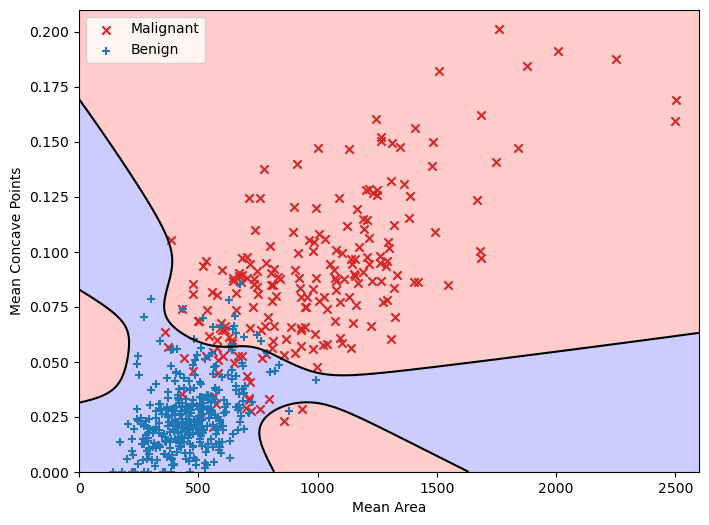

In [24]:
model = SVC(kernel='poly', C=100.0, degree=6, coef0=1.0)
model.fit(X_norm, Y)
plot_classification_sklearn(model, norm)

At this point, just like with the regression examples we saw, the model is probably starting to overfit.  And just like before, we can counteract this to some extent by increasing the regularization parameters (or in scikit learn's terminology, decreasing the $C$ parameter).

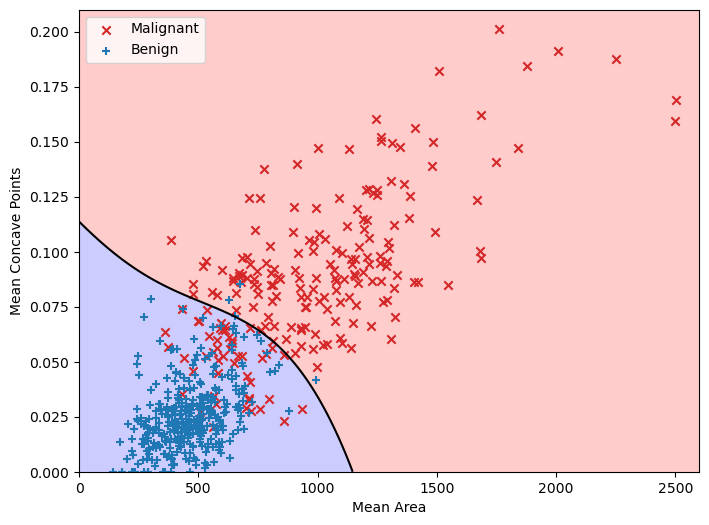

In [25]:
model = SVC(kernel='poly', C=0.01, degree=6, coef0=1.0)
model.fit(X_norm, Y)
plot_classification_sklearn(model, norm)

### `RBF Kernel`

Next, let us fit several radial basis function (RBF) Kernel-based classifiers: Note that a core hyperparameter of RBFs is the bandwidth ($\sigma$). We can set $\sigma$ using the `gamma` ($\gamma$) parameter in scikit learn, where `gamma` is the inverse of sigma (i.e., $\sigma = \frac{1}{\gamma}$). Thus, a very large `gamma` means small bandwidth $\sigma$.

`C` is again a regularization parameter.

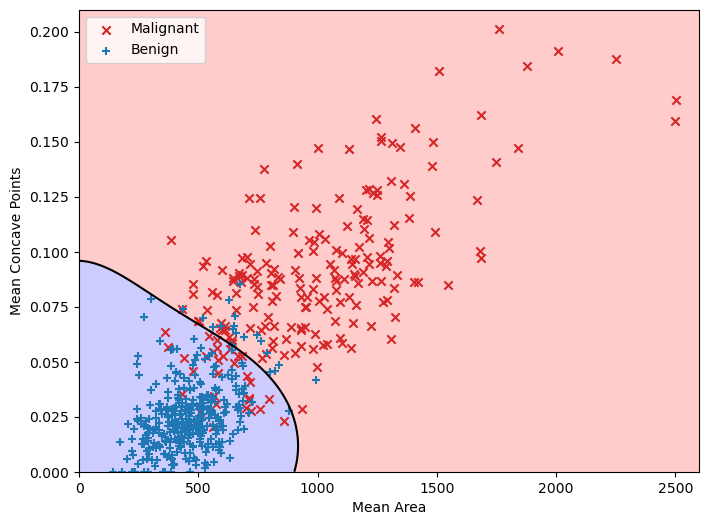

In [26]:
gamma = 1 / (X_norm.shape[1] * X_norm.var()) # scikit-learn uses gamma = 1/(n_features*X.var()) as default parameterization
model_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma)
model_rbf.fit(X_norm, Y)
plot_classification_sklearn(model_rbf, norm)

And finally, because all these example admittedly look fairly similar (the decision boundary _is_ roughly linear with some noise, after all), let's consider a case where we make the bandwidth small enough so that the method is guaranteed to overfit to the training data.  Here we make the bandwidth very small (i.e. large $\gamma$), and the regularization small (i.e. large $C$), so that the classifier manages to get nearly 100% accuracy on the training data (of course with very poor generalization performance!).

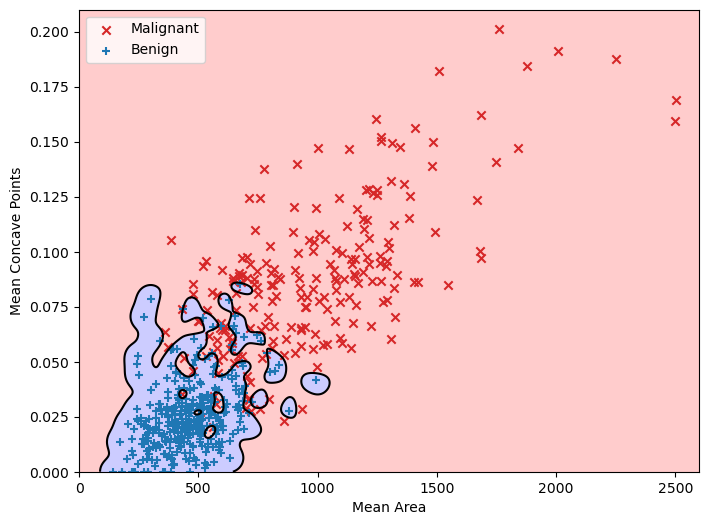

In [27]:
gamma = 1 / (X_norm.shape[1] * X_norm.var()) # scikit-learn uses gamma = 1/(n_features*X.var()) as default parameterization
model_rbf = SVC(kernel='rbf', C=100.0, gamma=100*gamma)
model_rbf.fit(X_norm, Y)
plot_classification_sklearn(model_rbf, norm)

The important thing to keep in mind through all this is how the nonlinear features and hyperparameter settings will influence the ability of functions to represent complex data and to overfit and underfit the data.  And of course, when using scikit learn, you'll need to understand the documentation to the point where you see how the hyperparameters of the class of interest map to the parameters that you actually want to control.  This usually requires going through the documentation a fair amount, but it's important, and the default parameters are often quite poor.

## `Evaluating Classification Models`

### Confusion Matrix

Confusion matrices plot true negatives (TN) and true positives (TP) vs. false negatives (FN) and false positives (FP). What results is a 2x2 matrix that provides an overview of classifier performance. See the [Wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix) for more info.

Let's check out how this looks like for our simplest case, the linear SVM prediction (`model_SVM`) with two features.

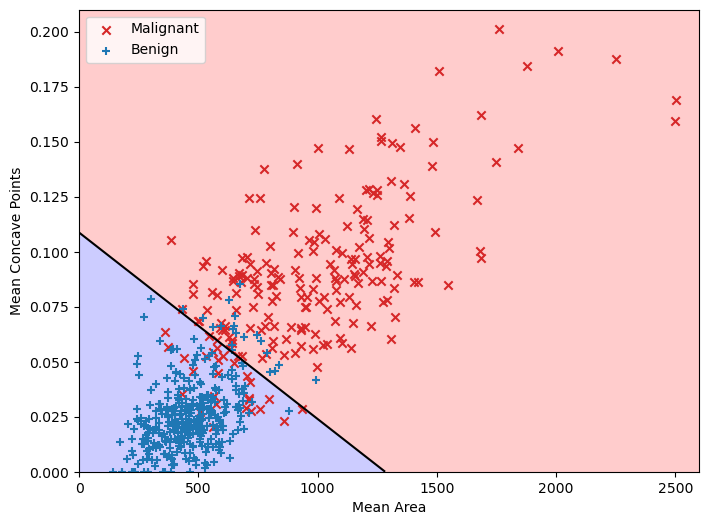

In [28]:
plot_classification_sklearn(model_SVM, norm)

In [29]:
# compute confusion matrix for our SVM model
import sklearn.metrics

confusion_matrix = sklearn.metrics.confusion_matrix(Y, model_SVM.predict(X_norm),labels=["M","B"])
print(confusion_matrix)

[[185  27]
 [ 20 337]]


Rows of the confusion matrix indicate **actual** values, while colums indicate **predicted** values. The `labels` argument allows us to order the confusion matrix. Setting it to `labels = ["M","B"]` ensures that the first row and first colum represent malignant entries. Therefore, we get:

|  | Malignant | Benign |
| --- | --- | --- |
| Malignant | TP | FN |
| Benign | FP | TN |

From this confusion matrix various additional performance metrics can be derived. Let us consider some of the most common ones:


### Accuracy

Accuracy is the ratio of all correctly classified samples vs. the total number of samples. It is computed as follows:

\begin{equation}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

The scikit learn implementation is straight forward:

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(Y, model_SVM.predict(X_norm))
print(accuracy_score)

0.9173989455184535


Relating this back to the confusion matrix from above:

In [31]:
(185+337)/sum(sum(confusion_matrix))

0.9173989455184535

### Precision

Precision is the ratio of all correctly classified positive samples vs. the total amount of classified positive samples. It provides the proportion of positive identifications that were actually correct and is computed as follows:

\begin{equation}
Precision = \frac{TP}{TP+FP}
\end{equation}

The scikit learn implementation is as follows:

In [32]:
from sklearn.metrics import precision_score
precision_score = precision_score(Y, model_SVM.predict(X_norm), pos_label="M")
print(precision_score)

0.9024390243902439


Relating this back to the confusion matrix from above:

In [33]:
(185)/(185+20)

0.9024390243902439

### True Positive Rate (Recall)

Recall is the ratio of true positives vs. all actual positives. It is computed as follows:

\begin{equation}
Recall = \frac{TP}{TP+FN}
\end{equation}

The scikit learn implementation is as follows:

In [34]:
from sklearn.metrics import recall_score
recall_score = recall_score(Y, model_SVM.predict(X_norm), pos_label="M")
print(recall_score)

0.8726415094339622


Relating this back to the confusion matrix from above:

In [35]:
(185)/(185+27)

0.8726415094339622

Note: Two other common evaluation metrics are [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and [precision-recall curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html). You can read up about them in the scikit learn documentation.

---

**End of workshop task**: The above exercises have been exclusively designed to illustrate the workings of relevant classification algorithms. One issue with that is that we have trained our algorithms on the full set of available data. While this is fine for understanding how classification works in general, it is not good practice for developing predictive models (as you know by now).

As a result, the classification metrics are relatively meaningless as we need to evaluate on previously unseen data. 

**Design a proper model development routine to train a high-performing classification algorithm for the breast cancer dataset. Proceed as follows:**

1. Define your feature and target sets
1. Partition the data into training, validation and test set
1. Train the algorithm on the training set
1. Tweak hyperparameters by validating on the validation set
1. Report test metrics from the unseen test set (only look at the test set once you are finished validating your model. Do not go back and forth as this would create leakage!)

In [36]:
# YOUR CODE HERE












---